In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import data from library
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# Data shape - train
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Data shape - test
x_test.shape

(10000, 32, 32, 3)

In [ ]:
# Uniqueness of label
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

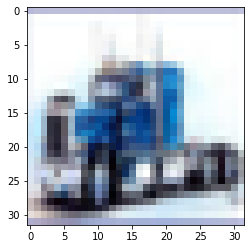

In [7]:
# Display instance
chosen_idx = 890
chosen_img = x_train[chosen_idx]
plt.imshow(chosen_img)
plt.show()

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# Create sequential model
model = Sequential()
model.add(Dense(512, input_shape=(1024*3,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Process the array of pixels - The train
x_train = x_train.reshape(50000, 32*32*3, 1)   # Reshaping
x_train = x_train.astype('float32')/255      # Rescaling

In [ ]:
x_train.shape

(50000, 3072, 1)

In [10]:
# Process the array of pixels - The test
x_test = x_test.reshape(10000, 32*32*3, 1)   # Reshaping
x_test = x_test.astype('float32')/255      # Rescaling

In [11]:
from keras.utils import to_categorical

# One-hot encoding - train set
one_hot_train = to_categorical(y_train)

# Print one-hot encoding
one_hot_train.shape

(50000, 10)

In [12]:
# One-hot encoding - test set
one_hot_test = to_categorical(y_test)

# Print one-hot encoding
one_hot_test.shape

(10000, 10)

In [23]:
# Compile model and train
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, one_hot_train, epochs=100, batch_size=128)

# Test set evaluation
test_loss, test_acc = model.evaluate(x_test, one_hot_test)
print('Test Loss:', test_loss)
print('Test Acc.:', test_acc)

Epoch 1/100
391/391 [==============================] - 17s 41ms/step - loss: 2.0434 - accuracy: 0.2660
Epoch 2/100
391/391 [==============================] - 14s 35ms/step - loss: 1.7855 - accuracy: 0.3570
Epoch 3/100
391/391 [==============================] - 14s 35ms/step - loss: 1.6913 - accuracy: 0.3913
Epoch 4/100
391/391 [==============================] - 14s 35ms/step - loss: 1.6240 - accuracy: 0.4191
Epoch 5/100
391/391 [==============================] - 14s 35ms/step - loss: 1.5687 - accuracy: 0.4400
Epoch 6/100
391/391 [==============================] - 14s 35ms/step - loss: 1.5263 - accuracy: 0.4551
Epoch 7/100
391/391 [==============================] - 14s 35ms/step - loss: 1.4923 - accuracy: 0.4660
Epoch 8/100
391/391 [==============================] - 14s 35ms/step - loss: 1.4647 - accuracy: 0.4785
Epoch 9/100
391/391 [==============================] - 14s 35ms/step - loss: 1.4310 - accuracy: 0.4888
Epoch 10/100
391/391 [==============================] - 14s 36ms/step - l

In [24]:
# Define classes' keys
classes_keys = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
                5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [58]:
from keras.models import load_model

# Save model
#model.save('/content/model_1layer.h5')   # 1 Layer - 50 epochs
model.save('/content/model_3layer_100.h5')   # 3 Layers - 100 epochs

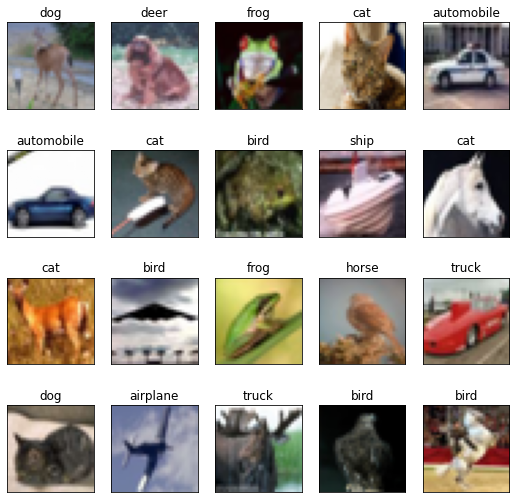

In [61]:
# Test image
figure = plt.figure(figsize=[9, 9])

for indx in range(100, 120, 1):
  chosen_img  = x_test[indx, :, :].reshape(1, -1)      # Choose an instance
  predict_num = np.argmax(model.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(4, 5, (indx+1)-100)
  axes.imshow(chosen_img.reshape(32, 32, 3))
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in classes_keys.keys():
    if predict_num == keys:
      plt.title(classes_keys[keys])
      break
    else:
      continue

Corgy Dog

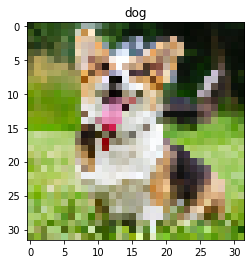

In [55]:
from keras.utils import load_img, img_to_array

# Image from path
file_name = '/content/dog_img.PNG'

# Image size info config.
m = 32
n = 32
img = load_img(file_name, target_size=(m,n))
plt.imshow(img)

# From image to array to predict
img = img_to_array(img)
img = img.astype('float32')
img = img/255
pred_value = np.argmax(model.predict(img.reshape(1, 32*32*3), verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue

Lockheed Martin's F35 Lightning Airplane

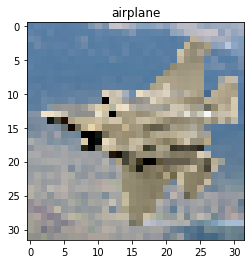

In [57]:
# Image from path
file_name = '/content/f35.PNG'

# Image size info config.
img = load_img(file_name, target_size=(m,n))
plt.imshow(img)

# From image to array to predict
img = img_to_array(img)
img = img.astype('float32')
img = img/255
pred_value = np.argmax(model.predict(img.reshape(1, 32*32*3), verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue